Кількість пропущених значень в кожному стовпці:
Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

Схема даних після перетворення:
Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

Перші п'ять рядків:
                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. P

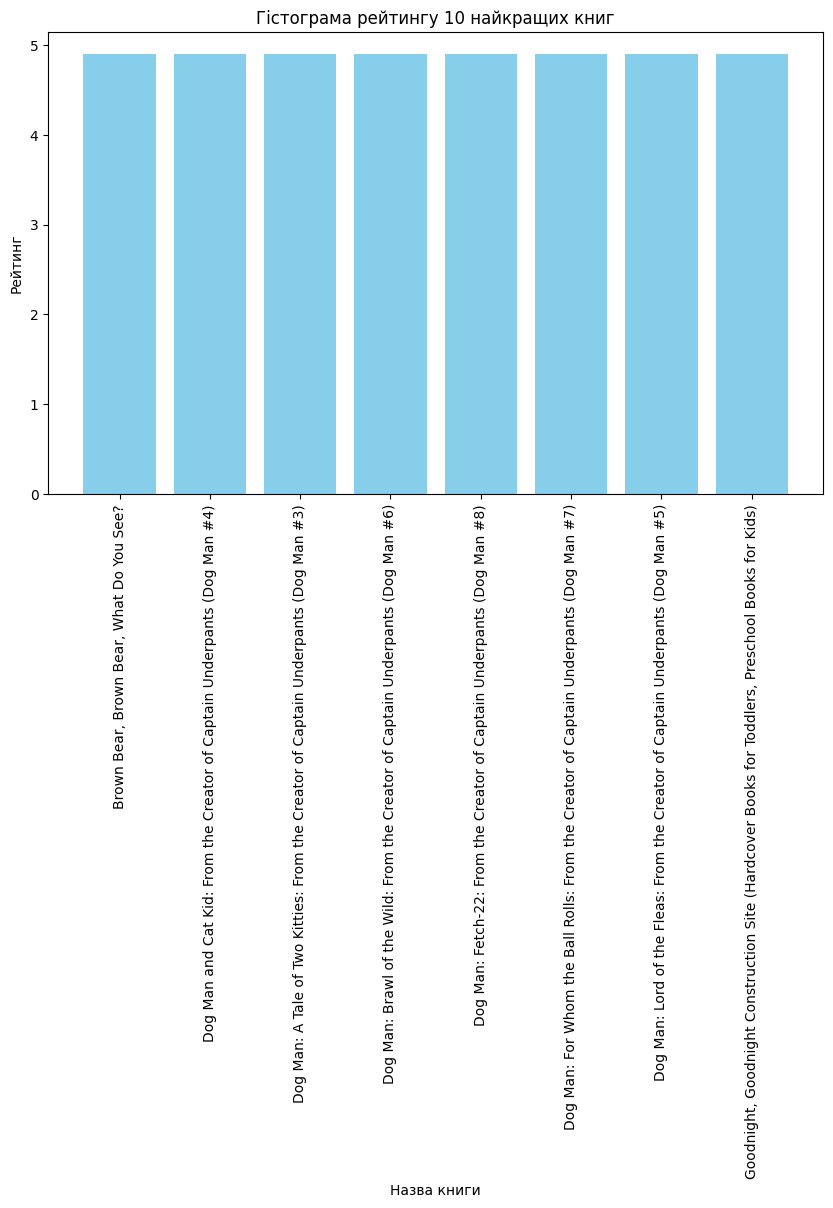


Матриця кореляції для стовпчиків 'User Rating', 'Reviews', 'Price':
             User Rating   Reviews     Price
User Rating     1.000000 -0.001729 -0.133086
Reviews        -0.001729  1.000000 -0.109182
Price          -0.133086 -0.109182  1.000000


In [17]:
import pandas as pd

# Зчитуємо дані з файлу
data = "/content/drive/MyDrive/Colab Notebooks/bestsellers_with_categories.csv"

# Читаємо файл і створюємо DataFrame
df = pd.read_csv(data)

# Виводимо кількість пропущених значень в кожному стовпці
print("Кількість пропущених значень в кожному стовпці:")
print(df.isnull().sum())

# Конвертуємо стовпці, що мають бути числовими, в числовий формат з параметром errors='coerce'
numeric_columns = ['User Rating', 'Reviews', 'Price', 'Year']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Виводимо схему даних після перетворення
print("\nСхема даних після перетворення:")
print(df.dtypes)

# Виводимо перші п'ять рядків
print("\nПерші п'ять рядків:")
print(df.head())

# Виводимо перший рядок
print("\nПерший рядок:")
print(df.head(1))

# Виводимо опис датасету
print("\nОпис датасету:")
print(df.describe())

# Виводимо список стовпців
print("\nСписок стовпців:")
print(df.columns)

# Виводимо загальну кількість рядків даних
print("\nЗагальна кількість рядків даних:", len(df))

# Виводимо кількість книг, що містяться в наборі даних
print("\nКількість книг у датасеті:", len(df))

# Змінюємо назви стовпців
df.columns = ['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']

# Знаходимо автора з найвищим рейтингом
highest_rating_author = df[df['User Rating'] == df['User Rating'].max()]['Author'].values[0]
print("\nАвтор з найвищим рейтингом:", highest_rating_author)

# Знаходимо автора з найнижчим рейтингом
lowest_rating_author = df[df['User Rating'] == df['User Rating'].min()]['Author'].values[0]
print("Автор з найнижчим рейтингом:", lowest_rating_author)

# Знаходимо автора з найбільшою кількістю рецензій
most_reviews_author = df[df['Reviews'] == df['Reviews'].max()]['Author'].values[0]
print("Автор з найбільшою кількістю рецензій:", most_reviews_author)

# Побудова гістограми рейтингу 10 найкращих книг
import matplotlib.pyplot as plt

top_10_books = df.nlargest(10, 'User Rating')
plt.figure(figsize=(10, 6))
plt.bar(top_10_books['Name'], top_10_books['User Rating'], color='skyblue')
plt.xlabel('Назва книги')
plt.ylabel('Рейтинг')
plt.title('Гістограма рейтингу 10 найкращих книг')
plt.xticks(rotation=90)
plt.show()

# Побудова матриці кореляції
correlation_matrix = df[['User Rating', 'Reviews', 'Price']].corr()
print("\nМатриця кореляції для стовпчиків 'User Rating', 'Reviews', 'Price':")
print(correlation_matrix)
